# a) SafeZone code 2D - Done (to study last bit)

## Plot 2D safe/violation zone

In [1]:
#total time must be < 128s  and total cost < 125p

T1 = 10
T2 = 20
T3 = 10
C1 = 3
C2 = 15
C3 = 10

P3 = 0.95

R1 = 0.75
R2 = 128
R3 = 125

[safe,violations]: [753, 9247]


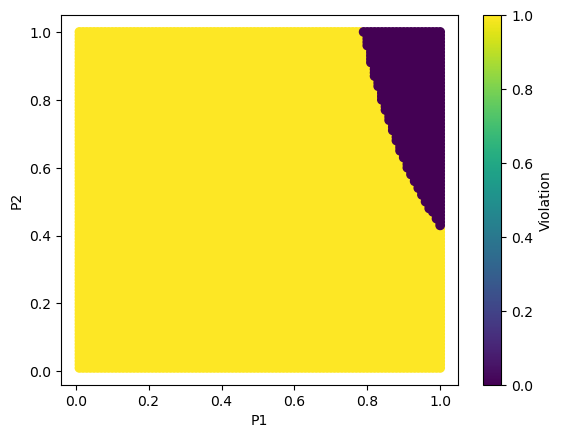

[safe,violations]: [36, 364]


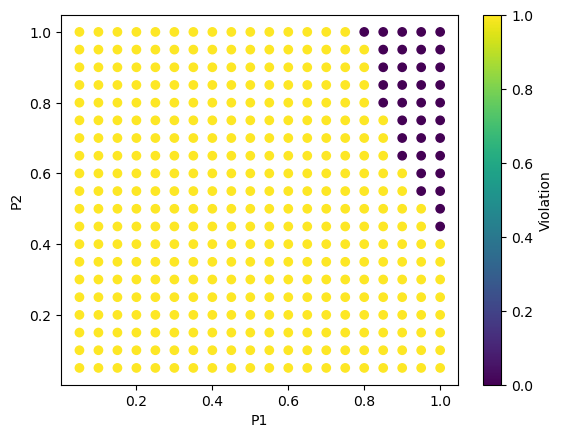

In [2]:
# function for 2 parameters, P1 and P2, between 0 and 1 with N sampling points in each dimension
import numpy as np
import matplotlib.pyplot as plt

def F(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, N):
    #row values: [P1,P2,violations]
    mat = np.full((N * N, 3), -1.0) #matrix full of -1 size: N^2 x 3
    
    pic = np.zeros((N, N), dtype=int) #matrix full of 0 size: N x N
    numsafe = 0
    ind= -1
    
    # divide [0,1] in N
    incr = 1/N
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            # combinations of values for P1 and P2 with a 0.05 increment
            P1 = incr * i
            P2 = incr * j
            # index
            ind+=1         # before: ind = i + N * (j - 1) - 1
            # add P1,P2
            mat[ind, 0] = P1
            mat[ind, 1] = P2
            # add violations
            mat[ind, 2] = 0
            if (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5) == 0:
                mat[ind, 2] = 1
                pic[j - 1, i - 1] = 1
            else:
                r1 = (10 * P1 * P2 * P3) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r2 = (10 * P1 * P2 * T3 + 5 * T1 * P2 + 5 * T1 + 10 * P1 * T2) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r3 = (10 * P1 * P2 * C3 - 10 * P1 * P2 * P3 * C2 + 10 * P1 * P2 * C2 + 5 * C1 * P2 + 5 * C1) / (
                        3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                if r1 < R1 or r2 > R2 or r3 > R3:
                    mat[ind, 2] = 1
                    pic[j - 1, i - 1] = 1
                if pic[j - 1, i - 1] != 1:
                    numsafe += 1 # num of safe combinations of P1xP2
                
    numviolations = N * N - numsafe # num of violations
    prob = np.arange(1, N + 1) / N  # prob. array, e.g. for N=10: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]
    print("[safe,violations]:",[numsafe, numviolations])
    return [pic, mat, prob]


def show_scatter(N,m):
    # Sample data with three columns: x, y, data
    data_matrix = m[1]
    # Extract x, y, and data columns
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    data = data_matrix[:, 2]
    # Create a scatter plot with a specified colormap
    plt.figure()
    plt.scatter(x, y, c=data, cmap='viridis')  # Change 'viridis' to your desired colormap
    plt.xlabel("P1")
    plt.ylabel("P2")
    plt.colorbar(label="Violation")
    plt.show()


    

# Assuming P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, and N are defined
N = 100
m = F(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, N)
show_scatter(N,m)

N = 20
m = F(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, N)
show_scatter(N,m)

[safe,violations]: [3483, 6517]


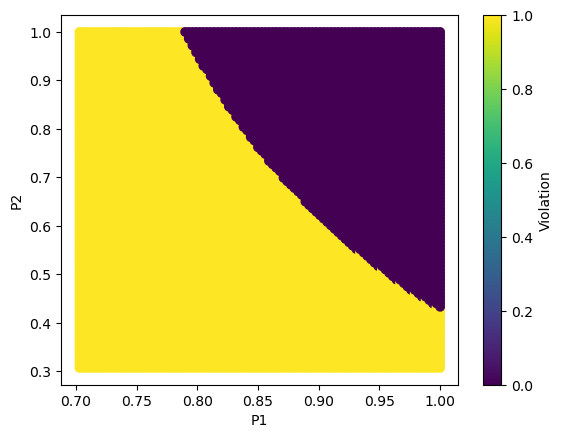

[safe,violations]: [153, 247]


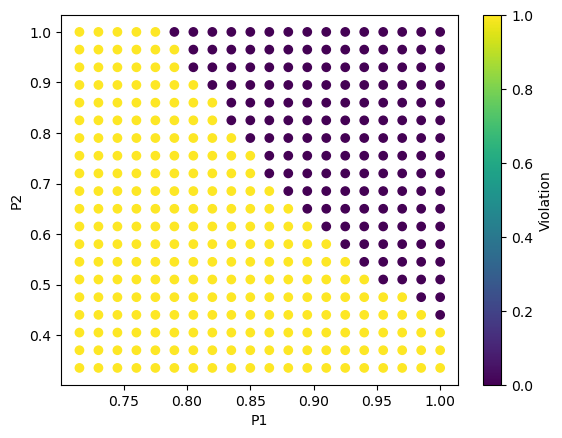

In [3]:
# function for 2 parameters, P1 and P2, between min and max with N sampling points in each dimension
import numpy as np
import matplotlib.pyplot as plt

def Nsteps2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, minP1, maxP1, minP2, maxP2, N):
    #row values: [P1,P2,violations]
    mat = np.full((N * N, 3), -1.0) #matrix full of -1 size: N^2 x 3
    
    pic = np.zeros((N, N), dtype=int) #matrix full of 0 size: N x N
    numsafe = 0
    ind= -1
    
    # divide range in N
    P1incr = (maxP1 - minP1)/N
    P2incr = (maxP2 - minP2)/N
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            # combinations of values for P1 and P2 with a 0.05 increment
            P1 = minP1 + P1incr * i
            P2 = minP2 + P2incr * j
            # index
            ind+=1         # before: ind = i + N * (j - 1) - 1
            # add P1,P2
            mat[ind, 0] = P1
            mat[ind, 1] = P2
            # add violations
            mat[ind, 2] = 0
            if (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5) == 0:
                mat[ind, 2] = 1
                pic[j - 1, i - 1] = 1
            else:
                r1 = (10 * P1 * P2 * P3) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r2 = (10 * P1 * P2 * T3 + 5 * T1 * P2 + 5 * T1 + 10 * P1 * T2) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r3 = (10 * P1 * P2 * C3 - 10 * P1 * P2 * P3 * C2 + 10 * P1 * P2 * C2 + 5 * C1 * P2 + 5 * C1) / (
                        3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                if r1 < R1 or r2 > R2 or r3 > R3:
                    mat[ind, 2] = 1
                    pic[j - 1, i - 1] = 1
                if pic[j - 1, i - 1] != 1:
                    numsafe += 1 # num of safe combinations of P1xP2
                
    numviolations = N * N - numsafe # num of violations
    cn = minP1 + np.arange(1,N+1)*P1incr # prob. arrays
    rn = minP2 + np.arange(1,N+1)*P2incr
    
    #print(cn) # e.g.: [0.715 0.73  0.745 0.76  0.775 0.79  0.805 0.82  0.835 0.85  0.865 0.88 0.895 0.91  0.925 0.94  0.955 0.97  0.985 1.]
    #print(rn)
    
    #prob = np.arange(1, N + 1) / N  # prob. array, e.g. for N=10: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]
    print("[safe,violations]:",[numsafe, numviolations])
    return [pic, mat, rn,cn]


def show_scatter(N,m):
    # Sample data with three columns: x, y, data
    data_matrix = m[1]
    # Extract x, y, and data columns
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    data = data_matrix[:, 2]
    # Create a scatter plot with a specified colormap
    plt.figure()
    plt.scatter(x, y, c=data, cmap='viridis')  # Change 'viridis' to your desired colormap
    plt.xlabel("P1")
    plt.ylabel("P2")
    plt.colorbar(label="Violation")
    plt.show()


    

# Assuming P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, min max, and N are defined
N = 100
m2 = Nsteps2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, 0.7, 1.0, 0.3, 1.0, N)
show_scatter(N,m2)

N = 20
m2 = Nsteps2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, 0.7, 1.0, 0.3, 1.0, N)
show_scatter(N,m2)

[safe,violations]: [11, 10]


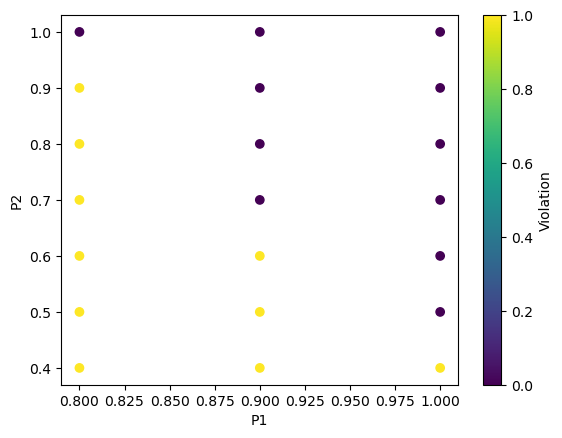

[safe,violations]: [131, 205]


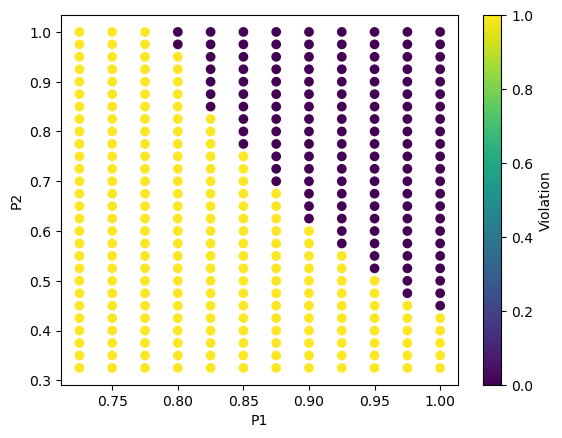

In [4]:
# function for 2 parameters, P1 and P2, between min and max with fixed probability step 
import numpy as np
import matplotlib.pyplot as plt

def FixedProbStep2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, minP1, maxP1, minP2, maxP2, step):
    M = round((maxP1 - minP1)/step)
    N = round((maxP2 - minP2)/step)
    
    #row values: [P1,P2,violations]
    mat = np.full((M * N, 3), -1.0) #matrix full of -1 size: N^2 x 3
    
    pic = np.zeros((N, M), dtype=int) #matrix full of 0 size: N x N
    numsafe = 0
    ind= -1
    
    # divide range in N
    #P1incr = (maxP1 - minP1)/N
    #P2incr = (maxP2 - minP2)/N
    for i in range(1, M + 1):
        for j in range(1, N + 1):
            # combinations of values for P1 and P2 with a 0.05 increment
            P1 = minP1 + step * i
            P2 = minP2 + step * j
            # index
            ind+=1         # before: ind = i + N * (j - 1) - 1
            # add P1,P2
            mat[ind, 0] = P1
            mat[ind, 1] = P2
            # add violations
            mat[ind, 2] = 0
            if (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5) == 0:
                mat[ind, 2] = 1
                pic[j - 1, i - 1] = 1
            else:
                r1 = (10 * P1 * P2 * P3) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r2 = (10 * P1 * P2 * T3 + 5 * T1 * P2 + 5 * T1 + 10 * P1 * T2) / (3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                r3 = (10 * P1 * P2 * C3 - 10 * P1 * P2 * P3 * C2 + 10 * P1 * P2 * C2 + 5 * C1 * P2 + 5 * C1) / (
                        3 * P1 * P2 + 5 * P2 - 3 * P1 + 5)
                if r1 < R1 or r2 > R2 or r3 > R3:
                    mat[ind, 2] = 1
                    pic[j - 1, i - 1] = 1
                if pic[j - 1, i - 1] != 1:
                    numsafe += 1 # num of safe combinations of P1xP2
                
    numviolations = M * N - numsafe # num of violations
    cn = minP1 + np.arange(1,M+1)*step # prob. arrays
    rn = minP2 + np.arange(1,N+1)*step
    
    #print(cn) # e.g.: [0.715 0.73  0.745 0.76  0.775 0.79  0.805 0.82  0.835 0.85  0.865 0.88 0.895 0.91  0.925 0.94  0.955 0.97  0.985 1.]
    #print(rn)
    
    #prob = np.arange(1, N + 1) / N  # prob. array, e.g. for N=10: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]
    print("[safe,violations]:",[numsafe, numviolations])
    return [pic, mat, rn,cn]


def show_scatter(N,m):
    # Sample data with three columns: x, y, data
    data_matrix = m[1]
    # Extract x, y, and data columns
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    data = data_matrix[:, 2]
    # Create a scatter plot with a specified colormap
    plt.figure()
    plt.scatter(x, y, c=data, cmap='viridis')  # Change 'viridis' to your desired colormap
    plt.xlabel("P1")
    plt.ylabel("P2")
    plt.colorbar(label="Violation")
    plt.show()


    

# Assuming P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, min max, and N are defined
N = 0.1
m3 = FixedProbStep2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, 0.7, 1.0, 0.3, 1.0, N)
show_scatter(N,m3)

N = 0.025
m3 = FixedProbStep2d(P3, C1, C2, C3, T1, T2, T3, R1, R2, R3, 0.7, 1.0, 0.3, 1.0, N)
show_scatter(N,m3)

 ## Calculate distance to boundary 

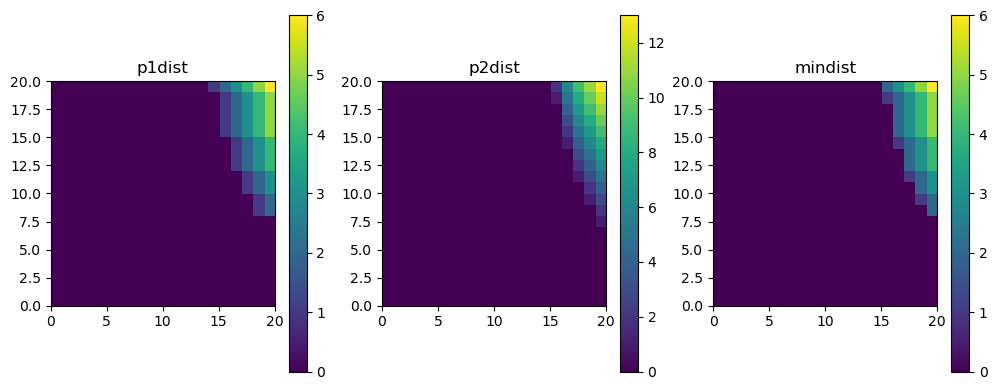

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### - Select data matrix
mat = m[0]

# Define the distance function
def distb(v):
    len_v = len(v)
    if v[0] == 1:
        d = np.zeros(len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 0 and v[i - 1] == 1:
                b = i - 1
        if b > 0:
            for j in range(1, len_v - b + 1):
                d[j + b - 1] = j
    else:
        d = np.full(len_v, len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 1 and v[i - 1] == 0:
                b = i
        if b > 0:
            for j in range(0, b):
                d[j] = b - j
    return d

# Calculate p2dist and p1dist
p2dist = np.apply_along_axis(distb, 0, mat)
p1dist = np.apply_along_axis(distb, 1, mat)

# Create heatmaps using Matplotlib
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(p1dist, cmap='viridis', extent=[0, p1dist.shape[1], 0, p1dist.shape[0]], origin='lower')
plt.title('p1dist')
plt.colorbar()

plt.subplot(132)
plt.imshow(p2dist, cmap='viridis', extent=[0, p2dist.shape[1], 0, p2dist.shape[0]], origin='lower')
plt.title('p2dist')
plt.colorbar()

mindist = np.minimum(p1dist, p2dist)

plt.subplot(133)
plt.imshow(mindist, cmap='viridis', extent=[0, mindist.shape[1], 0, mindist.shape[0]], origin='lower')
plt.title('mindist')
plt.colorbar()

plt.tight_layout()
plt.show()



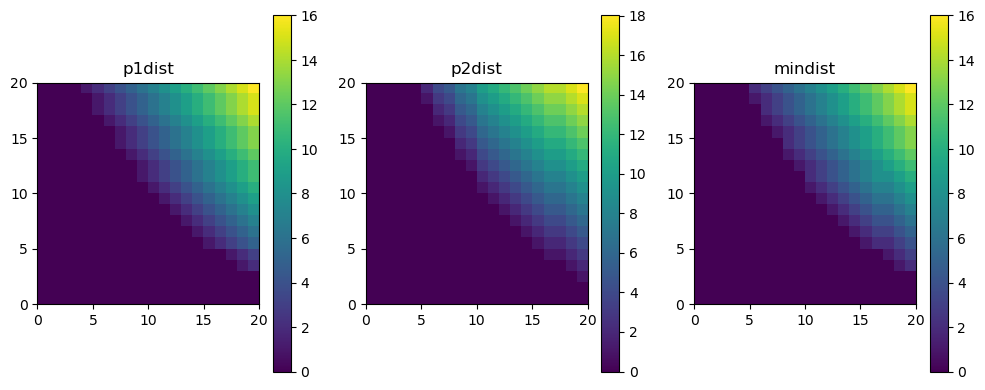

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### - Select data matrix
mat = m2[0]

# Define the distance function
def distb(v):
    len_v = len(v)
    if v[0] == 1:
        d = np.zeros(len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 0 and v[i - 1] == 1:
                b = i - 1
        if b > 0:
            for j in range(1, len_v - b + 1):
                d[j + b - 1] = j
    else:
        d = np.full(len_v, len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 1 and v[i - 1] == 0:
                b = i
        if b > 0:
            for j in range(0, b):
                d[j] = b - j
    return d

# Calculate p2dist and p1dist
p2dist = np.apply_along_axis(distb, 0, mat)
p1dist = np.apply_along_axis(distb, 1, mat)

# Create heatmaps using Matplotlib
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(p1dist, cmap='viridis', extent=[0, p1dist.shape[1], 0, p1dist.shape[0]], origin='lower')
plt.title('p1dist')
plt.colorbar()

plt.subplot(132)
plt.imshow(p2dist, cmap='viridis', extent=[0, p2dist.shape[1], 0, p2dist.shape[0]], origin='lower')
plt.title('p2dist')
plt.colorbar()

mindist = np.minimum(p1dist, p2dist)

plt.subplot(133)
plt.imshow(mindist, cmap='viridis', extent=[0, mindist.shape[1], 0, mindist.shape[0]], origin='lower')
plt.title('mindist')
plt.colorbar()

plt.tight_layout()
plt.show()



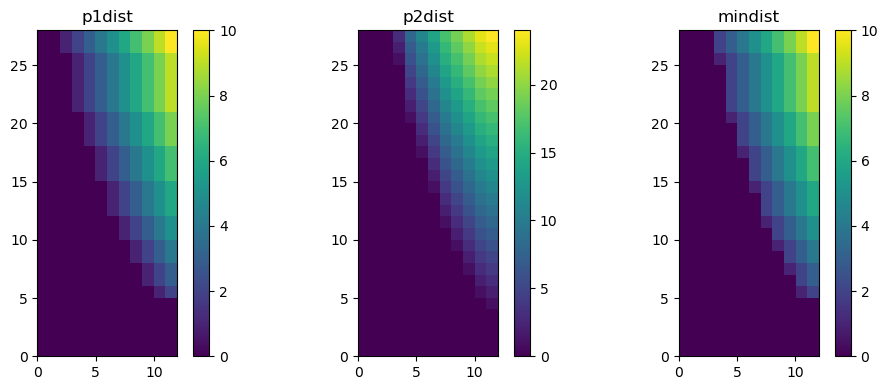

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#### - Select data matrix
mat = m3[0]

# Define the distance function
def distb(v):
    len_v = len(v)
    if v[0] == 1:
        d = np.zeros(len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 0 and v[i - 1] == 1:
                b = i - 1
        if b > 0:
            for j in range(1, len_v - b + 1):
                d[j + b - 1] = j
    else:
        d = np.full(len_v, len_v, dtype=int)
        b = 0
        for i in range(1, len_v):
            if v[i] == 1 and v[i - 1] == 0:
                b = i
        if b > 0:
            for j in range(0, b):
                d[j] = b - j
    return d

# Calculate p2dist and p1dist
p2dist = np.apply_along_axis(distb, 0, mat)
p1dist = np.apply_along_axis(distb, 1, mat)

# Create heatmaps using Matplotlib
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(p1dist, cmap='viridis', extent=[0, p1dist.shape[1], 0, p1dist.shape[0]], origin='lower')
plt.title('p1dist')
plt.colorbar()

plt.subplot(132)
plt.imshow(p2dist, cmap='viridis', extent=[0, p2dist.shape[1], 0, p2dist.shape[0]], origin='lower')
plt.title('p2dist')
plt.colorbar()

mindist = np.minimum(p1dist, p2dist)

plt.subplot(133)
plt.imshow(mindist, cmap='viridis', extent=[0, mindist.shape[1], 0, mindist.shape[0]], origin='lower')
plt.title('mindist')
plt.colorbar()

plt.tight_layout()
plt.show()


# b) Synthetic Data

## First function : P1

840


<function matplotlib.pyplot.show(close=None, block=None)>

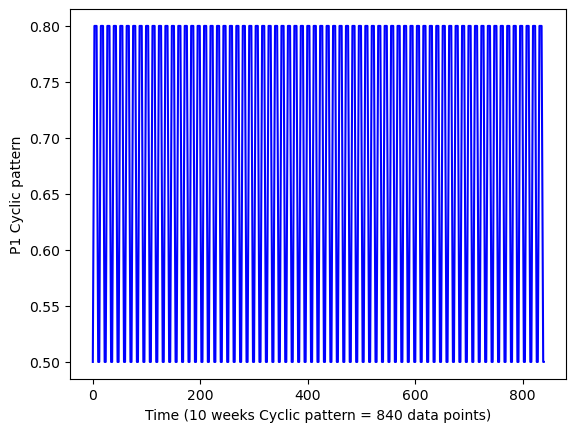

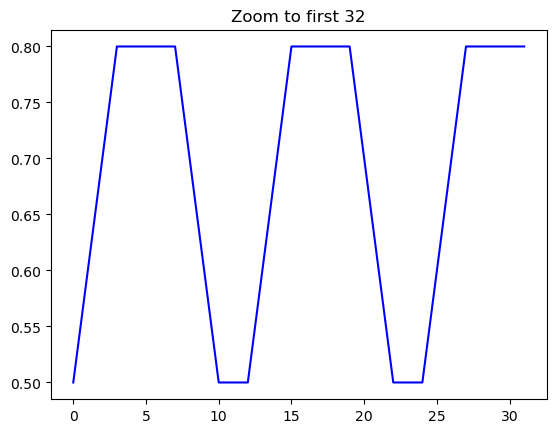

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 12 time points from 24 hours
x = np.array([0.5, 0.6, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.6, 0.5, 0.5]) #cyclic pattern
# one week of such data
y = np.tile(x, 7)
# 10 weeks of data
y = np.tile(y, 10) #flat numpy list of 'x' 70 times, len(y)=12*7*10=840
print(len(y))

#time
t = np.arange(0, len(y) )

plt.figure()
plt.plot(t, y , 'b-')
plt.xlabel("Time (10 weeks Cyclic pattern = 840 data points)")
plt.ylabel("P1 Cyclic pattern")
plt.show

plt.figure()
zoom = 32
plt.title("Zoom to first {}".format(zoom))
plt.plot( t[0:zoom] , y[0:zoom], 'b-')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

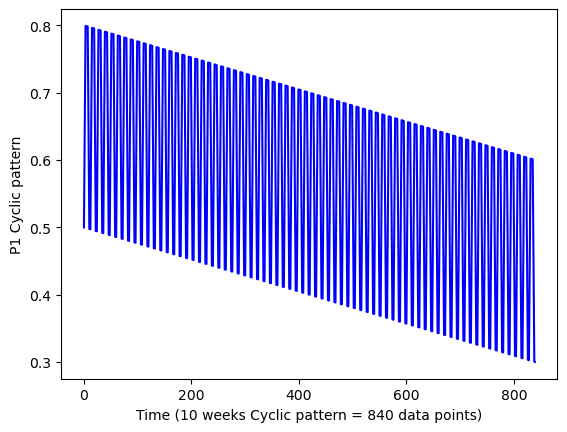

In [9]:
# trend drops p = 0.2 in 10 weeks
# .2/1008 = 0.0001984127
trend_drop = 0.2 / len(y)
trend_drop = -trend_drop * t   #t = -0.0001984127 * t

plt.figure()
plt.plot(t, y+trend_drop , 'b-')
plt.xlabel("Time (10 weeks Cyclic pattern = 840 data points)")
plt.ylabel("P1 Cyclic pattern")
plt.show

Text(0.5, 1.0, 'P1 Data with Trend and Error component')

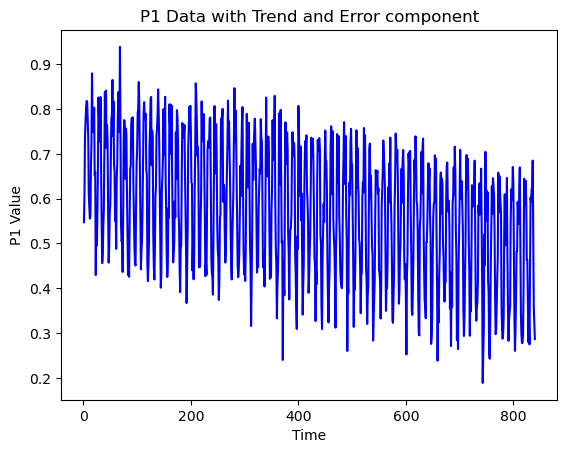

In [10]:
# random noise
n = np.random.normal(loc=0, scale=0.05, size=len(y))

# add trend and random noise to seasonal data
P1 = y + trend_drop + n
plt.plot(np.arange(1, len(P1) + 1), P1, 'b-')
plt.xlabel("Time")
plt.ylabel("P1 Value")
plt.title("P1 Data with Trend and Error component")

Text(0, 0.5, 'Seasonal Component')

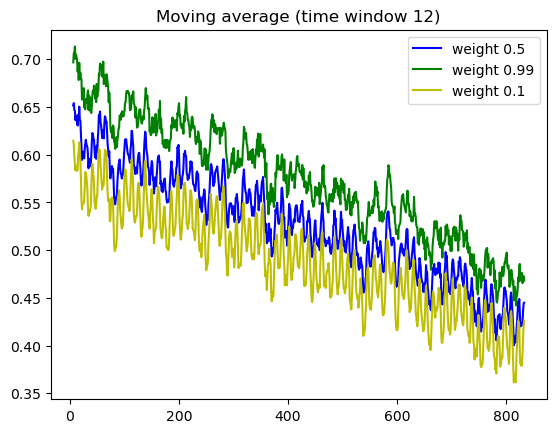

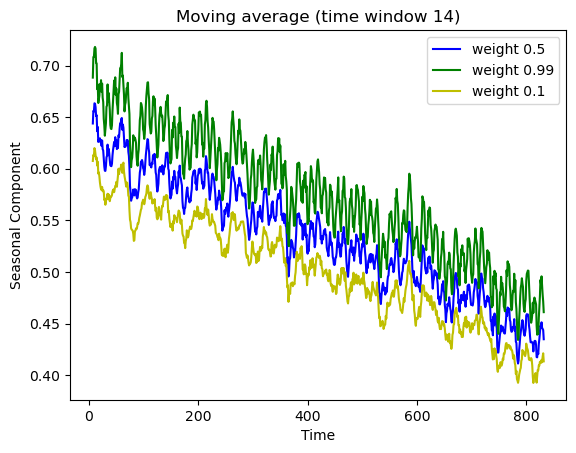

In [11]:
# Season filter - get seasonal component
# time window: 12 (for current point, 'average' among 6 before and 6 after average)
# 'average' <- first and last point are weighted differently. The weights of the rest are 1. Summed and divided by time window.

#Description: A seasonal filter is a weighted average of a moving span of fixed length within a time series that can be used to remove a fixed seasonal pattern. X-13ARIMA-SEATS uses several of these filters,

def filter_data(tWindow,weight,P1):
    Pz = np.zeros(len(P1) - tWindow)  #removed 6 points at the beggining and 6 at the end as not enough data to filter in the time window
    for i in range(int(tWindow / 2), len(P1) - int(tWindow / 2)): #i is the current time, i.e., half point of the time window
        firstElement = P1[i - int(tWindow / 2)] 
        lastElement = P1[i + int(tWindow / 2)]
        # 'average' over time window
        Pz[i - int(tWindow / 2)] = (weight*firstElement + np.sum(P1[i - int(tWindow/2)+1 :i + int(tWindow/2)-1]) + weight*lastElement) / tWindow
    return Pz


#plot different weights and tWindows

weight1 = 0.5      #seasonal weights; in a stable seasonal filter: https://www.mathworks.com/help/econ/seasonal-filters.html
weight2 = 0.99
weight3 = 0.1


tWindow = 12      #known periodicity of the seasonality                # has to be even num.
P1z = filter_data(tWindow,weight1,P1)   # weight = 0.5
P1z2 = filter_data(tWindow,weight2,P1) # weight = 0.99
P1z3 = filter_data(tWindow,weight3,P1)


tWindow2 = 14     #known periodicity of the seasonality                # has to be even num.
P1z21 = filter_data(tWindow2,weight1,P1)
P1z22 = filter_data(tWindow2,weight2,P1) # weight = 0.99
P1z23 = filter_data(tWindow2,weight3,P1)


plt.figure()
plt.title(str("Moving average (time window {})").format(tWindow))
i=tWindow/2
plt.plot(np.arange(i, len(P1z)+i), P1z, 'b-', label='weight {}'.format(weight1))
plt.plot(np.arange(i, len(P1z2)+i), P1z2, 'g-', label='weight {}'.format(weight2))
plt.plot(np.arange(i, len(P1z2)+i), P1z3, 'y-', label='weight {}'.format(weight3))
plt.legend()

plt.figure()
plt.title(str("Moving average (time window {})").format(tWindow2))
i=tWindow2/2
plt.plot(np.arange(i, len(P1z21)+i), P1z21, 'b-', label='weight {}'.format(weight1))
plt.plot(np.arange(i, len(P1z22)+i), P1z22, 'g-', label='weight {}'.format(weight2))
plt.plot(np.arange(i, len(P1z23)+i), P1z23, 'y-', label='weight {}'.format(weight3))
plt.legend()

plt.xlabel("Time")
plt.ylabel("Seasonal Component")

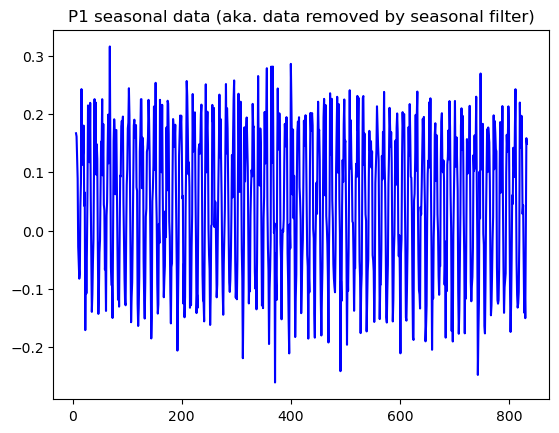

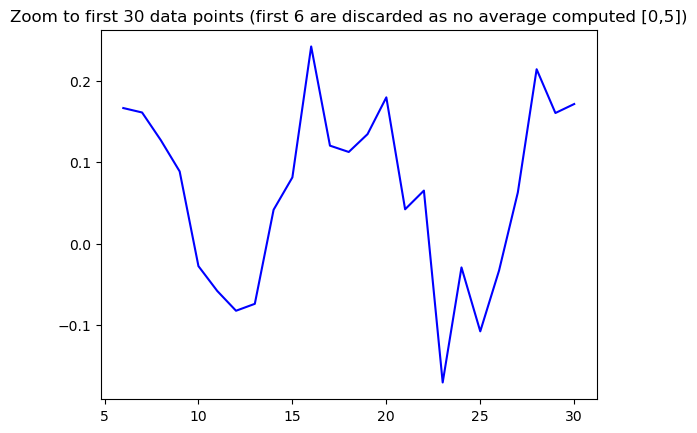

In [12]:
# Visualization of the removed seasonal component
i = int(tWindow/2)

seasonal = P1[i-1 : len(P1)-1-i ]-P1z


plt.figure()
plt.title("P1 seasonal data (aka. data removed by seasonal filter)")
plt.plot( t[ i : len(P1)-i ] , seasonal, 'b-', label='weight {}'.format(weight1))

plt.figure()
zoom = 30    #must be even
plt.title("Zoom to first {} data points (first {} are discarded as no average computed [0,{}])".format(zoom,i,i-1))
plt.plot( t[ i : zoom+1 ] , seasonal[0:zoom-i+1], 'b-', label='weight {}'.format(weight1))



-0.00022512681073607563


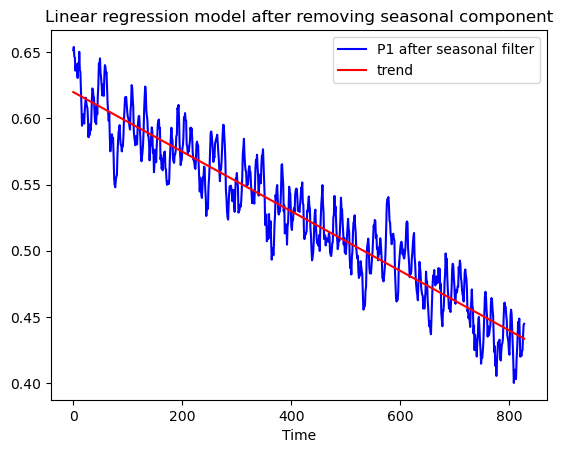

In [13]:
# Linear trend - Fit linear model
# - make a model after removing the seasonal component

# using polyfit - fit polinomial functions
model1 = np.polyfit(np.arange(0, len(P1z)), P1z, 1)
trend1 = model1[0]
print(trend1)

# plot the data (after removing the seasonal component) with regression line
plt.figure()
plt.plot(np.arange(0, len(P1z)), P1z, 'b-',label="P1 after seasonal filter")
plt.plot(np.arange(0, len(P1z)), np.polyval(model1, np.arange(0, len(P1z))), 'r-', label="trend")
plt.xlabel("Time")
plt.title("Linear regression model after removing seasonal component")
plt.legend()


plt.show()



-0.00022512681082705578


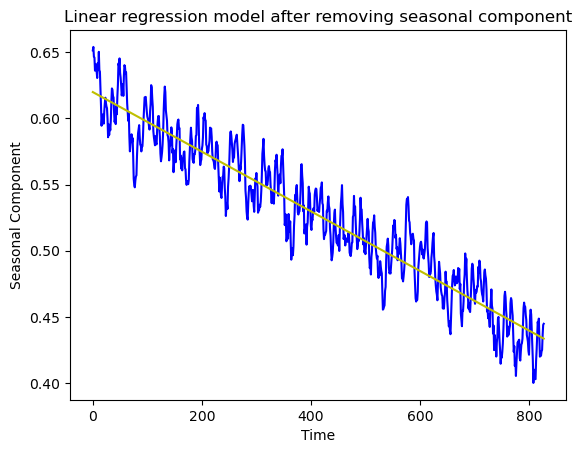

In [14]:
# Linear trend - Fit linear model
#- make a model after removing the seasonal component

#using curve_fit - it can be used for nonlinear curve fitting, not limited to polynomial funct.
from scipy.optimize import curve_fit

def linear_model(x, slope, intercept):
    return slope * x + intercept

params, _ = curve_fit(linear_model, np.arange(0, len(P1z)), P1z)
slope, intercept = params
trend1 = slope
print(trend1)

# plot the data (after removing the seasonal component) with regression line
plt.figure()
plt.plot(np.arange(0, len(P1z)), P1z, 'b-')
plt.plot(np.arange(0, len(P1z)), linear_model(np.arange(0, len(P1z)), slope, intercept), 'y-')
plt.xlabel("Time")
plt.ylabel("Seasonal Component")
plt.title("Linear regression model after removing seasonal component")

plt.show()


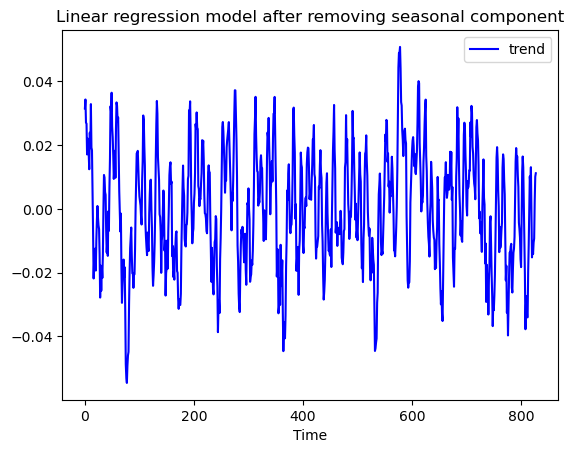

In [15]:
# Subtract the trends 

P1not = P1z - np.polyval(model1, np.arange(0, len(P1z)))
# plot the data (after removing the seasonal component) with regression line
plt.figure()
plt.plot(np.arange(0, len(P1not)), P1not, 'b-', label="trend")
plt.xlabel("Time")
plt.title("Linear regression model after removing seasonal component")
plt.legend()


plt.show()

## Second function : P2

-0.0004812672519320147


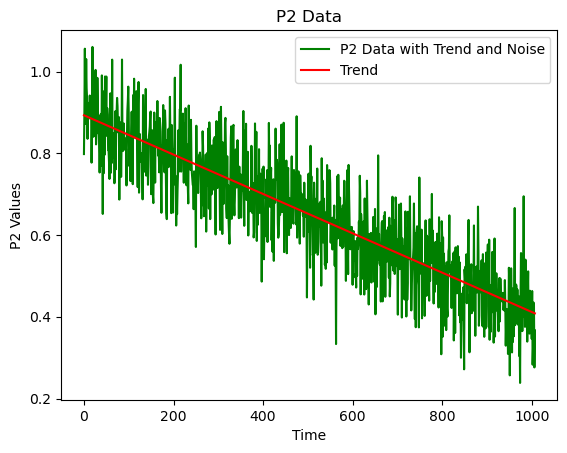

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# 12 time points from 24 hours for 10 weeks
y = np.repeat(0.9, 1008) #0.9 array of length 12*24*10=2880, 1008???***
x = np.arange(0, len(y))
# trend drops p = 0.5 in 10 weeks
# .5/1008 = 0.0004960317
trend_drop = 0.5 / 1008
trend_drop = -trend_drop * x #t = -0.0004960317 * x
# random noise
n = np.random.normal(loc=0, scale=0.08, size=1008)
P2 = y + trend_drop + n

plt.figure()
plt.plot(x, P2, 'g-',label="P2 Data with Trend and Noise")
plt.xlabel("Time")
plt.ylabel("P2 Values")
plt.title("P2 Data")


# using polyfit - fit polinomial functions
model2 = np.polyfit(np.arange(0, len(P2)), P2, 1)
trend2 = model2[0]
print(trend2)

plt.plot(x, np.polyval(model2, np.arange(0, len(P2))), 'r-', label="Trend")
plt.legend()
plt.show()

## Substract trends

In [17]:
#Plot lines of n standard deviation
def plot_line_sd(nTimes,Psd,col):
    plt.axhline(y=nTimes * Psd, color=col, linestyle='--',label="{} sigma".format(nTimes))
    plt.axhline(y=-nTimes * Psd, color=col, linestyle='--')
    return 

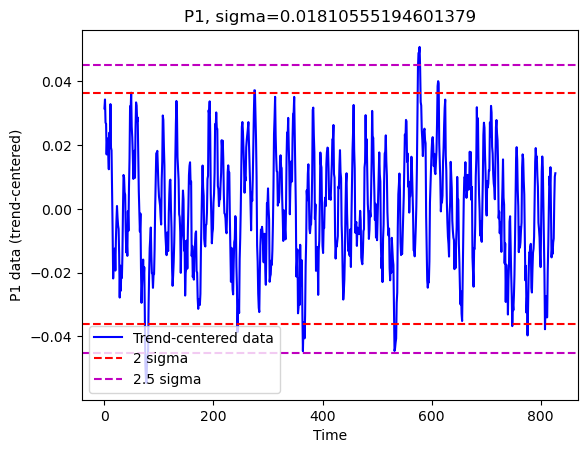

In [18]:
# Subtract the trends P1
P1not = P1z - np.polyval(model1, np.arange(0, len(P1z)))
# Calculate standard deviations
P1sd = np.sqrt(np.var(P1not))

# plot the data (after removing the seasonal component) with regression line
plt.figure()

plt.plot(np.arange(0, len(P1not)), P1not, 'b-', label="Trend-centered data")
plot_line_sd(2,P1sd,'r')
plot_line_sd(2.5,P1sd,'m')

plt.title("P1, sigma={}".format(P1sd))
plt.xlabel("Time")
plt.ylabel("P1 data (trend-centered)")
plt.legend()
plt.show()

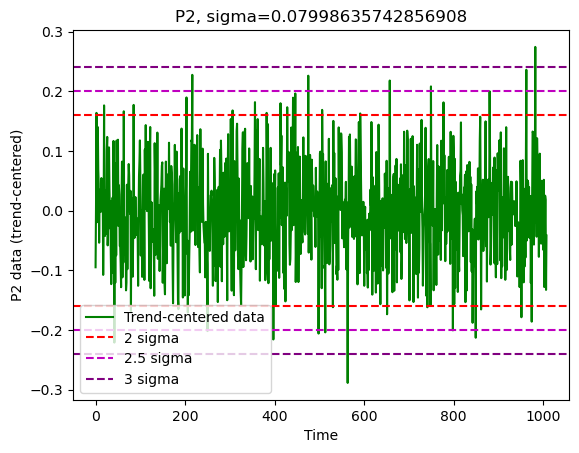

In [19]:
# Subtract the trends P2
P2not = P2 - np.polyval(model2, np.arange(0, len(P2)))
# Calculate standard deviations
P2sd = np.sqrt(np.var(P2not))

# plot the data (after removing the seasonal component) with regression line
plt.figure()
plt.plot(np.arange(0, len(P2not)), P2not, 'g-', label="Trend-centered data")
plot_line_sd(2,P2sd,'r')
plot_line_sd(2.5,P2sd,'m')
plot_line_sd(3,P2sd,'purple')

plt.title("P2, sigma={}".format(P2sd))
plt.xlabel("Time")
plt.ylabel("P2 data (trend-centered)")
plt.legend()
plt.show()

## Calculate time to safezone - v gives the number of probability units to the boundary

In [20]:
# calculate time to safezone - v gives the number of probability units to the boundary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def time(v, trend, pstep, timestep):
    len_v = len(v)
    t = np.zeros(len_v)+1
    for i in range(len_v):
        t[i] = (-v[i] * pstep) / trend
    return t * timestep

In [21]:
#dist is the number of probability steps to the boundary
#p1dist from beggining
#p2dist from beggining

# Apply the time function to p1dist and p2dist using np.apply_along_axis
tp1 = np.apply_along_axis(time, 0, p1dist, trend1, 0.025, 2)
tp2 = np.apply_along_axis(time, 0, p2dist, trend2, 0.025, 2)

# Create DataFrames for tp1 and tp2 with appropriate row names
tp1_df = pd.DataFrame(tp1, index=mat.index)
tp2_df = pd.DataFrame(tp2, index=mat.index)

# Plot the heatmaps
plt.figure()
plt.imshow(tp1_df.T, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title("Heatmap for tp1")
plt.xlabel("Sample")
plt.ylabel("Time")

plt.figure()
plt.imshow(tp2_df.T, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title("Heatmap for tp2")
plt.xlabel("Sample")
plt.ylabel("Time")

# Calculate the minimum of tp1 and tp2
tp = np.minimum(tp1, tp2)

# Create a DataFrame for tp with appropriate row and column names
tp_df = pd.DataFrame(tp, index=mat.index, columns=mat.columns)

# Plot the heatmap for tp
plt.figure()
plt.imshow(tp_df.T, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title("Heatmap for tp (Minimum of tp1 and tp2)")
plt.xlabel("Sample")
plt.ylabel("Time")



AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# Define the color function
def color(m1, m2, m):
    x, y = m.shape
    out = np.copy(m)
    for i in range(x):
        for j in range(y):
            if out[i, j] > 0:
                if out[i, j] == m1[i, j]:
                    out[i, j] = 1
                else:
                    out[i, j] = 2
    return out

# Apply the color function to tp1, tp2, and tp
out = color(tp1, tp2, tp)

# Create a DataFrame for out with appropriate row and column names
out_df = pd.DataFrame(out, index=mat.index, columns=mat.columns)

# Plot the heatmap for out
plt.figure()
plt.imshow(out_df.T, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title("Heatmap for Colored Data")
plt.xlabel("Sample")
plt.ylabel("Time")

# Third function for P3
# 12 time points from 24 hours for 10 weeks
y = np.repeat(0.75, 1008)
x = np.arange(1, len(y) + 1)
# trend drops p = 0.15 in 10 weeks
# 0.15/1008 = 0.0001488095
t = -0.0001488095 * x
# random noise
n = np.random.normal(loc=0, scale=0.02, size=len(y))

P3 = y + t + n

plt.figure()
plt.plot(x, P3, 'b-')

# Fit a linear model to P3
model3 = np.polyfit(x, P3, 1)
trend3 = model3[0]
plt.plot(x, np.polyval(model3, x), 'purple-')

# Subtract the trend from P3
P3not = P3 - np.polyval(model3, x)
P3sd = np.sqrt(np.var(P3not))

# Plot data with trends removed and limits
plt.figure()
plt.plot(x, P3not, 'b-')
plt.axhline(2 * P3sd, color='red')
plt.axhline(-2 * P3sd, color='red')
plt.axhline(2.5 * P3sd, color='magenta')
plt.axhline(-2.5 * P3sd, color='magenta')
plt.axhline(3 * P3sd, color='purple')
plt.axhline(-3 * P3sd, color='purple')

plt.show()

